<p style="font-size:20px">ELEC-E7851 - Computational User Interface Design<br></p>
<p style="font-size:30px"><b>Computational Modeling Workflow</b></p>

**Aini Putkonen**, Aalto University

*Materials adapted from [Aurélien Nioche](https://github.com/AurelienNioche/LectureUserResearch/blob/master/OLD_lecture10.ipynb)*. If you have any questions or suggestions for the materials, please contact aini.putkonen@aalto.fi.

<div class="alert alert-block alert-success">
<h2><a class="tocSkip"></a>&nbsp;Learning objectives</h2>
    
<ul>
<li>Understand what is required of a good computational model of behavioral data.</li>
<li>Understand main steps in a systematic modeling workflow.</li>
<li>Be able to work through a modeling problem using a simple workflow.</li>
</ul>
</div>

<h2><a class="tocSkip"></a>&nbsp;Overview of the lecture</h2>

* What are computational models?
    * Examples of computational models in human-computer interaction
    * Features of a good computational model
* What is a computational modeling workflow?
* A simple workflow for computational modeling
    * Case introduction: Modeling user as a multi-armed bandit
    * Modeling workflow used in this lecture
    * Python setup
    * Bandit task definition
    * Defining candidate models
        * Candidate model 1: Random
        * Candidate model 2: Win-Stay Lose-Switch
        * Candidate model 3: Rescorla-Wagner
    * Forward simulation
    * In class exercise: Forward simulation
    * Parameter inference (generated data)
        * Define a likelihood function
        * Choose a method for fitting parameters
        * Generate data and fit
        * Explore parameter space
    * Parameter recovery
    * Parameter inference (experimental data)
    * Model comparison
* Summary
* Advanced topics
    * Group-level analysis
    * Bayesian inference
    * Other model checks
* References

# What are computational models?

<div class="alert alert-block alert-success">
<h4><a class="tocSkip"></a>&nbsp;Goal</h4> 
Understand what is required of a good computational model of behavioral data.
</div>

[**Broad definition**](https://www.nature.com/subjects/computational-models):

<p style="font-size:20px; padding-left: 120px; padding-right: 120px;text-align: center;line-height:150%;" ><i> "Computational models are <b>mathematical models</b> that are <b>simulated</b> using computation to study <b>complex systems</b>."</i></p>

<div class="alert alert-block alert-info">
In this lecture, we focus on <i>human behavior</i>, whereby the simulated models aim to capture some latent features of cognition. Why? Because in HCI in many applications we might be interested in modeling the behavior of a user (e.g., in visual search tasks, active learning or menu optimization).
</div>

Alternatively, we can define computational cognitive modeling as follows ([Kangasrääsiö et al., 2019, p.5](https://doi.org/10.1111/cogs.12738)):

<p style="font-size:20px; padding-left: 120px; padding-right: 120px;text-align: center;line-height:150%;" >Computational cognitive models<i> are built to <b>simulate human cognition</b> through the stepwise execution of a program. Like other models, cognitive models <b>map model parameters to predictions</b> of cognitive behavior.</i></p>

## Examples of computational models in human-computer interaction

Computational modeling is prevalent in HCI. Typically, results produced by a given computational model are compared to those resulting from experiments with humans. If the performance of the model is similar to that of humans, it may explain some aspects of the behavior underlying data. Some example application areas of computational models in HCI are included below. In addition, see p.6 [here](https://doi.org/10.1109/JPROC.2020.2969687).

**Visual search**

Computational models have been used in visual search tasks, where a target is detected in an environment (which may include distractors). For instance, [Butko and Movellan (2008)](https://doi.org/10.1109/DEVLRN.2008.4640819) approach visual search task by modeling it as a partially observable Markov process to capture the characteristics of the visual system, building on the model proposed by [Najemnik and Geisler (2005)](https://doi.org/10.1038/nature03390). In addition, [Hoppe & Rothkopf (2019)](https://doi.org/10.1038/s41598-018-37536-0) propose that the human visual system is capable of planning beyond the following fixation through a belief Markov decision process.

<img src="img/distractor-ratio.jpg" width="300">
<em>A distractor-ratio task, where the target is a red circle. Redrawn from Acharya et al. (2017).</em>


**Intelligent tutoring systems**

Some intelligent tutoring systems leverage information they can infer about the learner. For instance, [Nioche et al. (2020)](https://doi.org/10.1145/3397481.3450696) takes into account the learner's memory model. In addition, as discussed later in this notebook, some applications approach intelligent tutoring systems as bandit tasks, where the teacher is modeled.

**Menu search**

Computational models can be used to understand how users search menus. [Chen et al. (2015)](https://doi.org/10.1145/2702123.2702483) model menu search as a [Markov decision process](https://en.wikipedia.org/wiki/Markov_decision_process), where search adapts to the ecological constraints of the environment and cognitive and percpetual limits. Earlier work by [Hornof & Kieras (1997)](https://doi.org/10.1145/258549.258621) uses the EPIC cognitive architecture model a menu selection task to discover that people tend to process more than one menu item at once and display both random and systematic search strategies.

<img src="img/menu-search.jpg" width="200">
<em>Example menu search task, where target is the "Save..." functionality.</em>

**Multi-tasking**

Computational models can also be used to understand multi-tasking. [Jokinen et al. (2020)](https://doi.org/10.1177/0018720820927687) use hierarchical reinforcement learning to model the driver's visual attention.

<img style="display: inline;" src="img/tick.jpg" width="50" alt="tick" />
<h2 style="display: inline;">Features of a good computational model</h2>

A good computational model is difficult to build. Some features of a good computational model include (see, e.g., [Wilson & Collins, 2019](https://doi.org/10.7554/eLife.49547) and [Palminteri et al., 2017](https://doi.org/10.1016/j.tics.2017.03.011)):

* **Theoretical plausibility:** Computational models should include constructs that are theoretically plausible.

* **Description of some latent processes underlying behavior:** We are interested in understanding human behavior. Hence, a computational model should seek to explain some unobservable processes in cognition and behavior.

* **Parsimony:** Models should be as simple as needed.

* **Good predictive and generative performance**: In addition to being able to explain the modeled data, a good computational model should also be able to generate the behavior of interest.

# What is a computational modeling workflow?

<div class="alert alert-block alert-success">
<h4><a class="tocSkip"></a>&nbsp;Goal</h4> 
Understand main steps in a systematic modeling workflow.
</div>

<div class="alert alert-block alert-success">
After this lecture, you should be able to avoid the following mistakes in computational modeling:

* Applying a model and an inference technique when the task doesn't allow it
* Implementation errors
* Accepting a model without comparing it to alternative explanations
</div>

Many steps required in cognitive modeling have previously been passed on from modeler to modeler verbally ([Heathcote et al., 2015](https://doi.org/10.1007/978-1-4939-2236-9_2)), which has lead to attempts to collect them to systematic guidelines or workflows. The term workflow used in this notebook has been inspired by the use of the term in the context of Bayesian Data Analysis and software development. Using the definition from [Gelman et al. (2020, p.4)](https://arxiv.org/abs/2011.01808), a workflow is "*more general than an example but less precisely specified than a method*".

A computational modeling workflow should be applied for at least two purposes:

1. To build a candidate model and an experiment iteratively.
2. To sanity check the chosen model and inference technique used (including software).

Examples of in depth workflow diagrams can be found from [Gelman et al. (2020)](https://deepai.org/publication/bayesian-workflow) and [Wilson & Collins (2019)](https://iiif.elifesciences.org/lax/49547%2Felife-49547-fig1-v2.tif/full/,1500/0/default.jpg).

Let's consider the two purposes mentioned above in more detail.

<h2><a class="tocSkip"></a>&nbsp;Building a candidate model and an experiment iteratively</h2>

**Candidate model**

A modeling workflow can be used to iteratively build a model, which, for instance, [Gelman et al. (2020)](https://arxiv.org/abs/2011.01808) suggest. That is, in the beginning of modeling, it may be difficult to foresee which considerations could be interesting, calling for iterative model building.

**Experiment**

If the dataset used in computational modeling is not collected, the workflow can be used to improve data collection. That is, the experiment can be fine tuned to be as informative as possible for given candidate models. This is something [Wilson & Collins (2019)](https://doi.org/10.7554/eLife.49547) propose as the first part of their workflow.

<h2><a class="tocSkip"></a>&nbsp;Validating the chosen model and inference technique used (including software)</h2>

**Model and inference technique**

Sometimes the chosen model and inference technique may not produce results that are reliable. This may result from many reasons, calls for double-checking the model specification and/or inference technique.

**Software**

As the name suggests, computational modeling is undertaken using some software, often handling very complex modeling scenarios. This makes the modeling process prone to programming errors. A systematic computational modeling workflow helps in catching errors in software. 

<div class="alert alert-block alert-info">
Can you think of any other reasons why computational modeling could go wrong?
</div>

# A simple workflow for computational modeling

<div class="alert alert-block alert-success">
<h4><a class="tocSkip"></a>&nbsp;Goal</h4> 
Be able to work through a modeling problem using a simple workflow.
</div>

## Case introduction: A multi-armed bandit task

Assume that we're trying to model an agent in [a multi-armed bandit task](https://en.wikipedia.org/wiki/Multi-armed_bandit) from reinforcement learning. Specifically, imagine that the agent is faced with a choice between $N$ competing options and has a partial access to the properties of these options. The typical analogy is to consider a gambler who has to choose between different slot machines, having only partial access to the probability of obtaining a reward from each. The participant's goal is to maximize rewards from this task at a given number of time steps $T$.

<img src="img/selection-example.jpg" width="400">
<em>A bandit task where a user has to choose between two options A and B, giving a reward with probability 0.5 and 0.75, respectively. How does this user learn the probabilities of rewards from these two options?</em>

<div class="alert alert-block alert-info">
Similar to reinforcement learning, in this notebook the term <a href="https://en.wikipedia.org/wiki/Intelligent_agent"><i>agent</i></a> refers to an entity observing its environment and taking action based on their objective function. In our context, the agents represent humans behaving according to a given candidate model. In the context of HCI, the environment could be an adaptive system a user interacts with, where the user behaves according to some user model $M$.
</div>

<div class="alert alert-block alert-info">
In HCI, multi-armed bandits are used in, for instance, intelligent tutoring and recommender systems (e.g. <a href="https://doi.org/10.5281/zenodo.3554667">Clement et al., 2015</a> and <a href="https://doi.org/10.1145/3383313.3411547">Barraza-Urbina & Glowacka, 2020</a>). Note, however, that in these settings "the gambler" can be the system itself, providing recommendations based on exploration-exploitation of the user's responses, and they might hold a separate model of the user.
</div>

## Modeling workflow used in this lecture

In this section, a simple workflow for computational modeling is presented. Specifically, the following steps are considered:

- Forward simulations of a candidate model
- Parameter inference (using generated and experimental data)
- Parameter recovery
- Model comparison

<img src="img/simple-modeling-workflow.jpg" width="800">

The workflow is implemented in Python. We will walk through an implementation of the workflow for an individual agent (implementation for a group of agents is included in advanced topics). 

<img src="img/individual-group.jpg" width="800">

However, before implementing these modeling steps, we do the following:
   
- Define Python setup
- Define the task to be modeled
- Define candidate models

<div class="alert alert-block alert-warning">
Note that even though we consider relatively simple examples in this notebook, the presented methods can be extended to more complex models.
</div>

## Python setup

Ensure that the libraries below are installed in the environment.

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sys
import scipy
from itertools import product

from IPython.display import display, Math
%config InlineBackend.figure_format='retina'

In [7]:
# Define a folder for the bkp
BKP_FOLDER = "bkp"
DATA_FOLDER = "data"

# Create this folder if it doesn't exist
os.makedirs(BKP_FOLDER, exist_ok=True)

## Bandit task definition

Parameters: 
* Number of option ($N$)
* Distribution of probability over these options ($\{p_{\text{reward}}(i)\}_{i\in N}$)
* Number of trials ($T$)

In [40]:
# Define the parameters of the bandit task

N = 2 # Number of options
P = np.array([0.5, 0.75]) # Probability of different options
T = 500 # Number of trials

## Defining candidate models

A good choice of a candidate model depends on the task modeled, and whether a iterative model building approach is used (see [Gelman et al. 2020](https://arxiv.org/abs/2011.01808)). Also see section above on what makes a computational model good. In this notebook, we consider three candidate models: 1) random selection, 2) win-stay lose-switch and 3) Rescorla-Wagner.

In the chosen multi-armed bandit task, we will consider that each agent has the opportunity at each $t\in T$ to:
<ul>
    <li><b>Choose:</b> we will define for each model a "decision rule", more precisely, we model a probability distribution over the action choices such as:
\begin{equation}
\forall i: p_{\text{choice}}(i) \in [0, 1] \wedge \sum_{i}^N p_{\text{choice}}(i) = 1
\end{equation}
</ul>
<ul>
    <li><b>Learn:</b> we will define for each model an "updating rule".
</ul>

In [41]:
class GenericPlayer:
    
    """
    Generic Player
    """
    
    param_labels = ()
    fit_bounds = ()

    def __init__(self):
        self.options = np.arange(N)
        
    def decision_rule(self):
        raise NotImplementedError

    def learning_rule(self, option, success):
        raise NotImplementedError
        
    def choose(self):
        p = self.decision_rule()
        return np.random.choice(self.options, p=p)

<div class="alert alert-block alert-warning">
The three candidate models (random selection, win-stay lose-switch and Rescorla-Wagner) inherit from the  <code> GenericPlayer</code> class.
</div>

### Candidate model 1: Random

The first candidate model is simply random selection: the agent is equally likely to pick any of the $N$ presented options.

**Random selection**

* Decision rule:

\begin{equation}
p_{\text{choice}}(i) = 1/N
\end{equation}

In [42]:
class Random(GenericPlayer):
    
    """
    Random selection
    """

    def __init__(self):
        super().__init__()

    def decision_rule(self):
        return np.ones(N) / N
    
    def learning_rule(self, option, success):
        pass

<div class="alert alert-block alert-warning">
Note that the random selection model does not have any parameters to infer.
</div>

### Candidate model 2: Win-Stay Lose-Switch

If the agent observes a success from a given arm, they choose that arm again, otherwise they switch. In addition, the agent may choose randomly at any time with a given probability.

<b><a href="https://en.wikipedia.org/wiki/Win%E2%80%93stay,_lose%E2%80%93switch">Win-Stay-Lose-Switch</a> (Noisy variant)</b>

<ul>
    <li>Decision rule ($\epsilon$)
<ul>
\begin{equation}
p_{\text{choice}}(i) = 
\begin{cases}
1 - \epsilon + \epsilon / N & \text{if } r_{t-1} = 1 \wedge c_{t-1} = i,\\
\frac{1 - \epsilon}{N-1} + \epsilon / N & \text{if } r_{t-1} = 0 \wedge c_{t-1} \neq i\\
\epsilon / N & \text{otherwise.}\\
\end{cases}
\end{equation}

where $\epsilon \in [0, 1]$ is a free parameter describing the probability to choose randomly instead of applying the "Win-Stay-Lose-Switch' rule.

In [43]:
class WSLS(GenericPlayer):
    """
    Win-Stay-Lose-Switch
    """

    param_labels = "epsilon",
    fit_bounds = (0., 1),

    def __init__(self, epsilon):
        super().__init__()
        self.epsilon = epsilon

        self.c = -1
        self.r = -1

    def decision_rule(self):

        if self.c == -1:
            return np.ones(N) / N  # First turn

        p = np.zeros(N)

        p_apply_rule = 1 - self.epsilon # 1 - epsilon: apply the rule
        p_random = self.epsilon / N # epsilon: pick up randomly
        if self.r:
            p[self.options != self.c] = p_random
            p[self.c] = 1 - np.sum(p)  # p_apply_rule + p_random
        else:
            p[self.options != self.c] = p_apply_rule / (N - 1) + p_random
            p[self.c] = 1 - np.sum(p)  # p_random

        return p

    def learning_rule(self, option, success):
        self.r = success
        self.c = option

<div class="alert alert-block alert-warning">
Note that there is no learning in win-stay lose-switch, although the choice at $t$ can depend on the choice at $t-1$.
</div>

### Candidate model 3: Rescorla-Wagner

This is the only candidate model in this notebook, where we consider learning in the following way.

<b><a href="https://en.wikipedia.org/wiki/Rescorla%E2%80%93Wagner_model">Rescorla-Wagner</a></b>

<ul>
    <li>Updating rule ($\alpha$)
</ul>

\begin{equation}
Q^{t+1}(i) = Q^t(i) + \alpha [s - Q^t(i)]
\end{equation}

where:

<ul>
    <li> $s=1$ in case of success, 0 otherwise;
    <li> $\alpha \in [0, 1]$ is a free parameter describing to which extent a new success/failure will impact the $Q$-values.
</ul>


<ul>
    <li>Decision rule ($\beta$)
</ul>

\begin{equation}
p_{\text{choice}}(i) = \dfrac{e^{\beta Q(i)}}{\sum_{j \in N} e^{\beta Q(j)}} 
\end{equation}

where $\beta \in [0, \infty]$ is a free parameter describing the stochasticity of the choice: the greater $\beta$ is, the more the $Q$-values will impact the probability distribution.

In [44]:
class RW(GenericPlayer):
    """
    Rescorla-Wagner
    """

    param_labels = r"$\alpha$", r"$\beta$",
    fit_bounds = (0.0, 1.0), (1.0, 20.0),

    def __init__(self, q_alpha, q_beta, initial_value=0.5):
        super().__init__()
        self.q_values = np.full(N, initial_value)
        self.q_alpha = q_alpha
        self.q_beta = q_beta

    def decision_rule(self):
        
        num = np.exp(self.q_beta * self.q_values)
        denom = np.sum(num)
        p_soft = num / denom
        return p_soft

    def learning_rule(self, option, success):
        err = success - self.q_values[option]
        self.q_values[option] += self.q_alpha * err 

## Forward simulation

With a given model definition, it is possible to simulate agents behaving according to that model. In fact, simulating a model shows how well it can generate a given effect of interest. This is important as often we are interested in both the generative and predictive performance of a model ([Palminteri et al. 2017](https://doi.org/10.1016/j.tics.2017.03.011)). In addition, forward simulation is also used later in this notebook when performing *parameter recovery*.

<img src="img/forward-simulation.jpg" width="800">

First, we define a function for running a simulation. We are experimenting with the most complicated model, Rescorla-Wagner.

In [49]:
def run_simulation(model, param):

    # Create the agent
    agent = model(*param)

    # Data containers
    choices = np.zeros(T, dtype=int)
    successes = np.zeros(T, dtype=bool)

    # Simulate the task
    for t in range(T):

        # Determine choice
        choice = agent.choose()

        # Determine success
        success = P[choice] > np.random.random()

        # Make agent learn
        agent.learning_rule(option=choice, success=success)

        # Backup
        choices[t] = choice
        successes[t] = success

    return pd.DataFrame({
        "time": np.arange(T),
        "choice": choices, 
        "success": successes})


# Seed the pseudo-random number generator
np.random.seed(0)

# We will experiment with Rescola-Wagner
model = RW

# Get data
param_single = np.array([0.1, 10.00])
bhv_single = run_simulation(model=model, param=param_single)

# Backup
bhv_single.to_csv(os.path.join(BKP_FOLDER, "bhv_single.csv"))

Then, let's load the data and examine the results in a tabular format.

In [50]:
# Load the data
bhv_single = pd.read_csv(os.path.join(BKP_FOLDER, "bhv_single.csv"), 
                         index_col=[0])
# Print...
display(bhv_single.head())

,time,choice,success
0,0,1,True
1,1,1,True
2,2,1,True
3,3,1,False
4,4,1,True


Finally, we will illustrate the results in a plot. Note that this agent tends to choose option 1 more, which is sensible as the probability of success in this arm is higher than the alternative (based on the task definition above). 

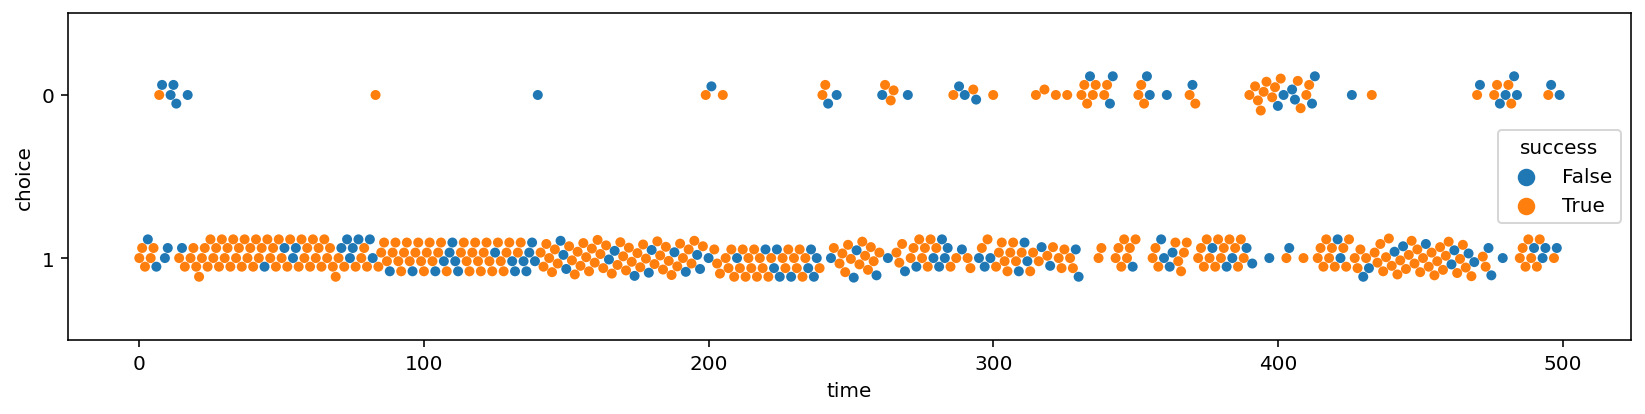

In [51]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(14, 3))

# Show choices and successes
sns.swarmplot(data=bhv_single, x='time', y='choice', ax=ax, orient="h", hue='success')

plt.show()

<div class="alert alert-block alert-warning">
We should simulate behavior for all three candidate models.
</div>

## In class exercise: Forward simulation

Behaviors should be simulated for all three candidate models. The block below contains the code used in simulations.

<div class="alert alert-block alert-info">
Exercise: Explain what $\alpha$, $\beta$ and $\epsilon$ do in Rescorla-Wagner and win-stay lose-switch. For example, you can simulate the models with the following parameters:
<li> Rescorla-Wagner with $\alpha=0.10$ and $\beta=0.9$
<li> Win-stay Lose-Switch with $\epsilon=0.9$
    
Tip: Compare the results to simulating with Random
</div>

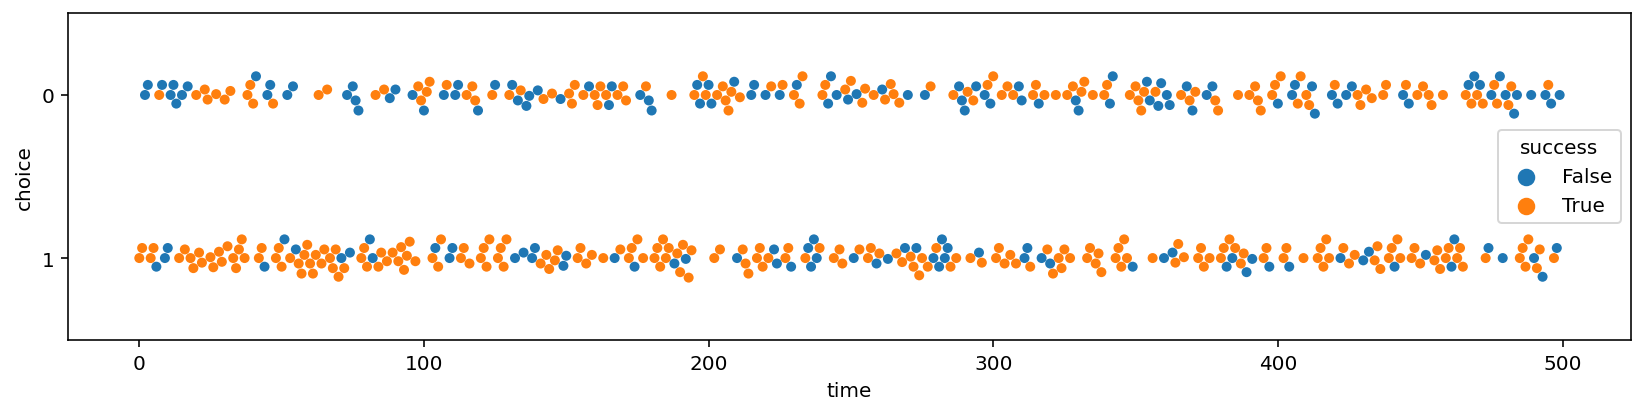

In [11]:
# Seed the pseudo-random number generator
np.random.seed(0)

# We will experiment with Rescola-Wagner
#model = Random
model = RW
#model = WSLS

# Get data
#param_single = np.array([])
param_single = np.array([0.10, 0.9])
#param_single = np.array([0.9])
bhv_single = run_simulation(model=model, param=param_single)

# Create figure and axes
fig, ax = plt.subplots(figsize=(14, 3))

# Show choices and successes
sns.swarmplot(data=bhv_single, x='time', y='choice', ax=ax, orient="h", hue='success')

plt.show()

<div class="alert alert-block alert-warning">
Hint: the class names for the candidate models were <code>RW</code>, <code>WSLS</code> and <code>Random</code>. The parameters are stored in an array containing as many elements as the model has parameters. For instance, for <code>RW</code> the parameters $\alpha$ and $\beta$ are stored in a two-element array <code>param_single</code>. The correct code for running different models is provided above (commented out). 
</div>

<div class="alert alert-block alert-danger">
Please only change models in the previous block for the in class exercise. Doing so elsewhere may break some of the demonstrations that follow.
</div>

## Parameter inference (generated data)

Two of the models considered in this notebook are parametric (win-stay lose-switch and Rescorla-Wagner). A quantitative specification of a model includes both a description (an algorithm or an equation) as well as an estimation of model parameters ([Lewandowsky and Farrell, 2010](https://www.doi.org/10.4135/9781483349428), p.109). We have described the models earlier in this notebook. This section concerns parameter estimation. We will estimate parameters using [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (MLE).

<img src="img/parameter-inference-generated.jpg" width="800">

### Define a likelihood function

* Determine the (log) likelihood of observing some data given your model and a specific parametrization:

\begin{equation}
\log p(D \mid M, \theta) = \sum_{d \in D} \log p(d \mid M, \theta)
\end{equation}

*Note: For several reasons (including numerical precision on computers but also easier algebraic manipulation), it is preferable to use the log-likelihood than the likelihood.*

In [52]:
def log_likelihood(model, param, data):

    # Create the agent
    agent = model(*param)

    # Data container
    ll = np.zeros(T)

    # Simulate the task
    for t in range(T):

        # Get choice and success for t
        c, s = data.choice[t], data.success[t]

        # Look at probability of choice
        p_choice = agent.decision_rule()
        p = p_choice[c]

        # Compute log
        ll[t] = np.log(p + np.finfo(float).eps)

        # Make agent learn
        agent.learning_rule(option=c, success=s)

    return np.sum(ll)

<div class="alert alert-block alert-warning">
Above, we consider the log-likelihood sum (LLS). That is, consider that we have dataset $D$ that contains data from each time step $t$. At each time step $t$ choice $d$ is recorded. Thus, the following is calculated:

\begin{aligned}
\text{log} p(D) &= \text{log}[p(d_1) \times p(d_2) ... \times p(d_t)] \\
\text{log} p(D) &= \text{log} p(d_1) + \text{log} p(d_2) + ... + \text{log} p(d_t) \\
\text{log} p(D) &= \sum \text{log} p(d)
\end{aligned}

This is implemented in the <code>log_likelihood</code> function above. The aim is to maximize LLS, which is equivalent to minimizing negative LLS.  
</div>

### Choose a method for fitting parameters

Then we define a way the optimizer decides which parameters to explore in the parameter space.

*Note: Here, we will use the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">function 'minimize' from the SciPy library</a>. However, there is multiple of other ways to do it.*, see for instance <a href="https://ipvs.informatik.uni-stuttgart.de/mlr/marc/teaching/13-Optimization/06-blackBoxOpt.pdf">here</a> 

In [53]:
def objective(param, model, data):
    # Since we will look for the minimum, 
    # let's return -LLS instead of LLS
    return - log_likelihood(model=model,
                            data=data,
                            param=param)

def optimize(model, data):

    # Define an init guess
    init_guess = [(b[1] - b[0])/2 for b in model.fit_bounds]

    # Run the optimizer
    res = scipy.optimize.minimize(
        fun=objective,
        x0=init_guess,
        bounds=model.fit_bounds,
        args=(model, data))

    # Make sure that the optimizer ended up with success
    assert res.success

    # Get the best param and best value from the 
    best_param = res.x
    best_value = res.fun

    return best_param, best_value

<div class="alert alert-block alert-warning">
We are maximizing log-likelihood, which is equivalent to minimizing negative log-likelihood.
</div>

### Generate data and fit

Let's use the data we previously generated using Rescorla-Wagner ($\alpha=0.10$ and $\beta=10.00$).

In [54]:
# Print...
display(bhv_single.head())

,time,choice,success
0,0,1,True
1,1,1,True
2,2,1,True
3,3,1,False
4,4,1,True


Then run the optimizer. Note that the inferred values for $\alpha$ and $\beta$ are close to the ground truth.

In [55]:
# Optimize
best_param, best_value = optimize(model=RW, data=bhv_single)

# Format
alpha_round = round(best_param[0],2)
beta_round = round(best_param[1],2)
lls_round = round(best_value,2)

# Print...
print ("-------------------------")
print("Estimates for parameters:") 
print ("-------------------------")
display(Math(r"\alpha: {}".format(alpha_round)))
display(Math(r"\beta: {}".format(beta_round)))

print ("---------------------------------")
print("Corresponding log-likelihood sum:") 
print ("---------------------------------")
display(Math(f"{lls_round}"))

-------------------------
Estimates for parameters:
-------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------------
Corresponding log-likelihood sum:
---------------------------------


<IPython.core.display.Math object>

### Explore parameter space

In the cells below, we examine the log-likelihood sums for some parameters. The chosen parameters are generated in the cell below.

In [56]:
# Choose the model
model = RW

# Choose the grid size
grid_size = 40

# Set the values to use for each parameter
parameter_values = np.atleast_2d([np.linspace(*b, grid_size) 
                                  for b in model.fit_bounds])

# Create a grid 
grid = np.asarray(list(product(*parameter_values)))

# Create a dataframe that stores it
grid_df = pd.DataFrame(grid, columns=(r"$\alpha$", r"$\beta$"))

# Print...
display(grid_df.head())

,$\alpha$,$\beta$
0,0.0,1.000000
1,0.0,1.487179
2,0.0,1.974359
3,0.0,2.461538
4,0.0,2.948718


The log-likelihood sums corresponding to these parameters are computed here. Note that this might take longer.

In [57]:
# Results container
row_list = []

print("Computing data for parameter space exploration...")
# Loop over each value of the parameter grid for both parameters
for _, param in tqdm(grid_df.iterrows(), total=len(grid_df), file=sys.stdout):

    # Compute the log likelihood
    ll = log_likelihood(
        data=bhv_single,  # THIS IS SPECIFIC
        model=RW,              # THIS IS SPECIFIC
        param=param)
    
    # Backup
    row_list.append({
        r"$\alpha$": param[r"$\alpha$"],
        r"$\beta$": param[r"$\beta$"],
        "log-likelihood": ll})

# Create a dataframe
ll_df = pd.DataFrame(row_list)

# Save it for later use
ll_df.to_csv(os.path.join(BKP_FOLDER, "log_likelihood_grid-bhv_single.csv"))

# Print...
display(ll_df.head())

Computing data for parameter space exploration...
100%|███████████████████████████████████████| 1600/1600 [00:31<00:00, 50.35it/s]


,$\alpha$,$\beta$,log-likelihood
0,0.0,1.000000,-346.57359
1,0.0,1.487179,-346.57359
2,0.0,1.974359,-346.57359
3,0.0,2.461538,-346.57359
4,0.0,2.948718,-346.57359


In [58]:
# Adapt the shape of the dataframe
ll_df_pivoted = ll_df.pivot(index=r"$\beta$", columns=r"$\alpha$", values="log-likelihood")

# Print...
display(ll_df_pivoted.head())

$\alpha$,0.000000,0.025641,0.051282,0.076923,0.102564,0.128205,0.153846,0.179487,0.205128,0.230769,...,0.769231,0.794872,0.820513,0.846154,0.871795,0.897436,0.923077,0.948718,0.974359,1.000000
$\beta$,,,,,,,,,,,,,,,,,,,,,
1.000000,-346.57359,-308.598769,-302.439952,-297.764475,-293.895062,-290.689473,-288.053874,-285.911228,-284.195571,-282.849659,...,-293.143453,-294.569540,-296.060791,-297.619784,-299.249804,-300.954841,-302.739596,-304.609495,-306.570714,-308.630214
1.487179,-346.57359,-292.344285,-283.828160,-277.492504,-272.341684,-268.156726,-264.792465,-262.131369,-260.074830,-258.539136,...,-281.997236,-284.602856,-287.324552,-290.167182,-293.136672,-296.240036,-299.485397,-302.882030,-306.440414,-310.172299
1.974359,-346.57359,-277.523587,-267.031319,-259.391298,-253.299590,-248.457628,-244.666893,-241.768724,-239.632477,-238.149505,...,-278.525737,-282.502533,-286.649395,-290.973264,-295.482497,-300.186914,-305.097853,-310.228255,-315.592752,-321.207786
2.461538,-346.57359,-264.095150,-251.966387,-243.329678,-236.585429,-231.354568,-227.384670,-224.476337,-222.468140,-221.228324,...,-281.068313,-286.515930,-292.185054,-298.084465,-304.224787,-310.618582,-317.280464,-324.227228,-331.477992,-339.054372
2.948718,-346.57359,-252.008422,-238.535783,-229.158247,-221.995893,-216.590072,-212.635146,-209.892131,-208.170404,-207.316978,...,-288.167469,-295.113690,-302.327205,-309.818806,-317.601760,-325.691962,-334.108091,-342.871790,-352.007849,-361.544405


Finally, the results are plotted.

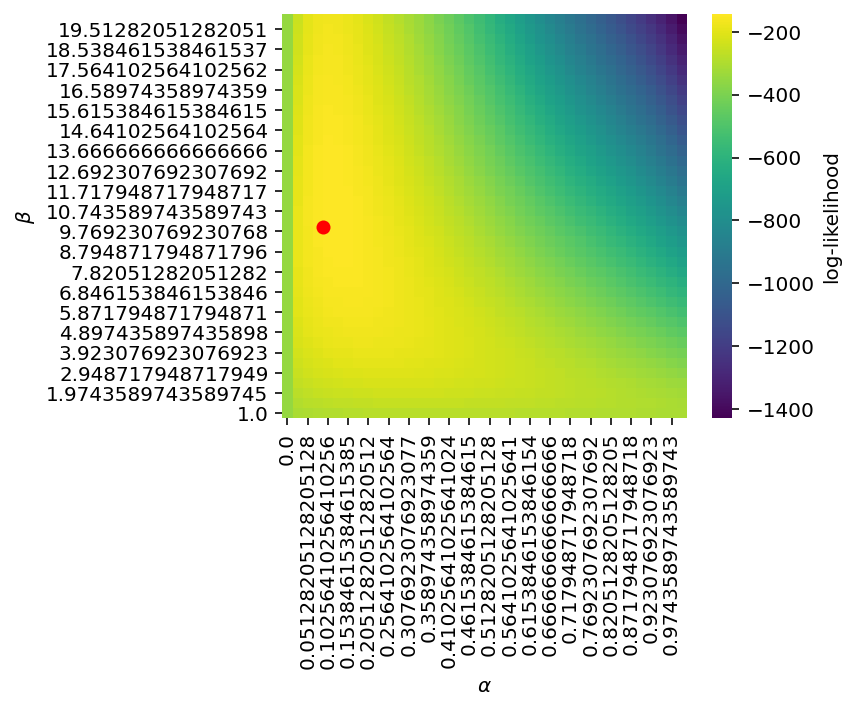

In [59]:
# Create figure and axes
generated_params = np.array([0.10, 10.00])
fig, ax = plt.subplots(figsize=(6, 5))

# Draw heatmap
sns.heatmap(data=ll_df_pivoted, cmap="viridis", ax=ax, cbar_kws={'label': 'log-likelihood'})


# Transform the parameter values into grid coordinates
coord_param = [(grid_size)*(p-b[0]) / (b[1]-b[0]) for p, b in zip(generated_params, model.fit_bounds)]
# Plot the position of the 'true' parameters
ax.scatter(*coord_param, color='red')

# Invert y-axis
ax.invert_yaxis()

# Make it look square
ax.set_aspect(1)

plt.tight_layout()
plt.show()

Earlier, we saw that the best fit parameters were $\alpha \approx 0.12$ and $\beta \approx 10.81$. The data come from $\alpha = 0.10$ and $\beta = 10$ (red dot).

## Parameter recovery

Parameter recovery is a technique using forward simulation and parameter estimation to verify whether a given model specification and parameter estimation technique produce accurate and consistent results (see, e.g., [Wilson & Collins, 2019](https://doi.org/10.7554/eLife.49547) or [Heathcote et al., 2015](https://doi.org/10.1007/978-1-4939-2236-9_2)). That is, consider data produced by a model with some parameters $\theta$. The same model is then fitted to this generated data to obtain inferred parameters $\hat{\theta}$. The generating parameters $\theta$ should be close to the inferred parameters $\hat{\theta}$. 

<div class="alert alert-block alert-warning">
We already run parameter recovery for one set of parameters in the previous section when fitting a model to generated data. Now we need to systematize the approach by generating data from various different parameter values, and then fitting a model to this data.
</div>

<img src="img/parameter-recovery.jpg" width="800">

<div class="alert alert-block alert-info">
Inadequate parameter recovery is a warning sign in modeling. It suggests that a given model specification or parameter inference technique might not be suitable for the given modeling task. As a caveat, even though unsuccessful parameter recovery is a warning sign suggesting that the given model should not be fitted to data with the chosen inference technique, good parameter recovery does not guarantee that results are reliable. However, they can increase our confidence in the inference results.
</div>

Let's run a parameter recovery simulation and observe the generating and inferred parameters.

In [60]:
# Seed the pseudo-random number generator
np.random.seed(1284)

# Select one model
model = RW

# Define the number of agents to simulate
n = 30 

# Data container
row_list = []

# For each agent...
for i in tqdm(range(n), file=sys.stdout):

    # Generate parameters to simualte
    param_to_sim = [np.random.uniform(*b)
                    for b in model.fit_bounds]

    # Simulate
    d = run_simulation(model=model, param=param_to_sim)

    # Optimize
    best_param, best_value = optimize(model=model, data=d)

    # Backup
    for j in range(len(param_to_sim)):
        row_list.append({
            "Parameter": model.param_labels[j],
            "Used to simulate": param_to_sim[j],
            "Recovered": best_param[j]})

# Create dataframe and save it
df = pd.DataFrame(row_list)
df.to_csv(os.path.join(BKP_FOLDER, "likelihood_explo.csv"))

100%|███████████████████████████████████████████| 30/30 [00:24<00:00,  1.23it/s]


<div class="alert alert-block alert-warning">
The loop above uses the two concepts presented earlier in this notebook: forward simulation and parameter estimation. Forward simulation is done using the function <code>run_simulation</code> and parameter estimation using <code>optimize</code>.
</div>

In [61]:
# Load the dataframe and display it
df = pd.read_csv(os.path.join(BKP_FOLDER, "likelihood_explo.csv"), index_col=[0])
display(df.head())

,Parameter,Used to simulate,Recovered
0,$\alpha$,0.774765,0.753370
1,$\beta$,15.400237,12.862639
2,$\alpha$,0.750155,0.801276
3,$\beta$,8.660672,13.036533
4,$\alpha$,0.498568,0.493770


Then let's plot the results.

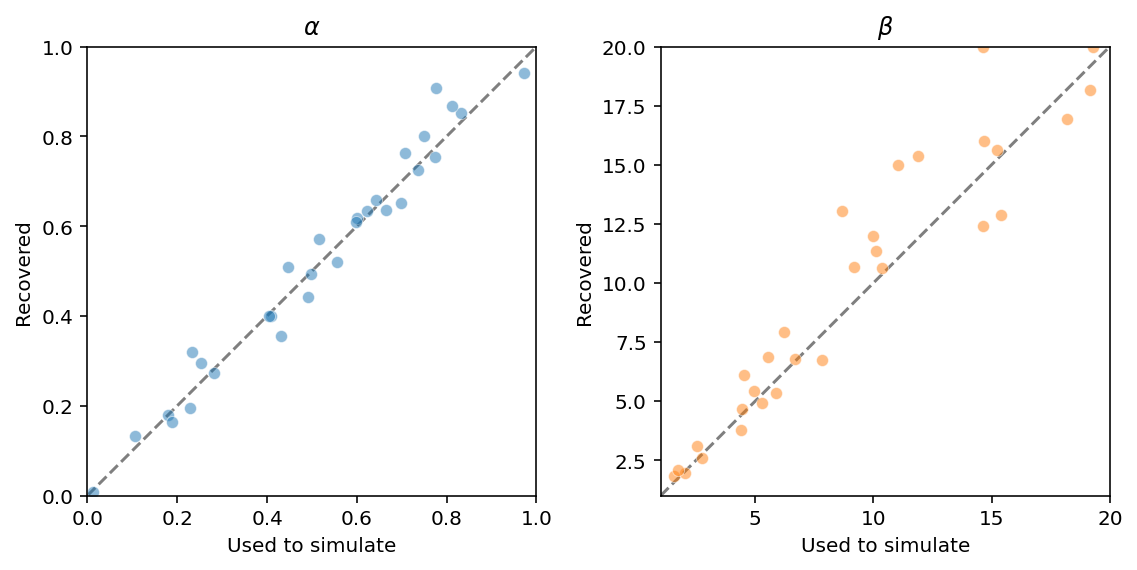

In [63]:
# Plot
param_names=RW.param_labels
param_bounds=RW.fit_bounds
n_param = len(param_names)

# Define colors
colors = [f'C{i}' for i in range(n_param)]

# Create fig and axes
fig, axes = plt.subplots(ncols=n_param,
                         figsize=(8, 8))

for i in range(n_param):

    # Select ax
    if n_param > 1:
        ax = axes[i]
    else:
        ax = axes
    
    # Get param name
    p_name = param_names[i]
    
    # Set title
    ax.set_title(p_name)

    # Create scatter
    sns.scatterplot(data=df[df["Parameter"] == p_name], 
                    x="Used to simulate", y="Recovered", 
                    alpha=0.5, color=colors[i], 
                    ax=ax)

    # Plot identity function
    ax.plot(param_bounds[i], param_bounds[i], 
            linestyle="--", alpha=0.5, color="black", zorder=-10)
    
    # Set axes limits
    ax.set_xlim(*param_bounds[i])
    ax.set_ylim(*param_bounds[i])

    # Square aspect
    ax.set_aspect(1)

plt.tight_layout()
plt.show()

Note that if parameter recovery is adequate, the dots presented in the plots above should lie along the line of equality ($x=y$).

<div class="alert alert-block alert-warning">
The above plots can be used to visually inspect the quality of parameter recovery. For more systematic analysis, we could calculate a metric measuring correlation between the simulated and recovered parameters (e.g., the Pearson correlation coefficient).
</div>

<div class="alert alert-block alert-info">
Note that a similar approach as presented above can be used in assessing <i>model comparison</i>. Model comparison verifies that simulation results from one model can be distinguished from the other candidates.
</div>

<div class="alert alert-block alert-info">
Parameter recovery needs to be verified for which of the candidate models in this notebook (random selection, win-stay lose-switch and Rescorla-Wagner)?
<br>a) All models, since parameter recovery should always be verified.
<br>b) Win-stay lose-switch and Rescorla-Wagner.
<br>c) Just Rescolar-Wagner.
</div>

## Parameter inference (experimental data)

Earlier we fitted one of our candidate models (Rescorla-Wagner) to *generated* data, where the ground truth is known. In reality, the goal is to fit a model to *experimental* data. In this case, the ground truth is mostly unknown.

<img src="img/parameter-inference-experimental.jpg" width="800">

<div class="alert alert-block alert-info">
The data used in model fitting may not come from a controlled experiment (i.e., it can be <i>naturalistic</i>). However, in this notebook, we'll assume the data considered is experimental.
</div>

Let's consider a case where data is collected for one individual in the bandit task presented in this notebook. We don't know which model the data comes from (or according to which model the individual behaves).

In [64]:
# Load the data
test_data = pd.read_csv(os.path.join(DATA_FOLDER, "test-data.csv"), 
                         index_col=[0])
# Print...
display(test_data.head())

,time,choice,success
0,0,1,True
1,1,1,True
2,2,1,True
3,3,1,False
4,4,1,True


Let's assume that we assume there's a good reason why this individual behaves according to Rescorla-Wagner. Then, the best fit parameter values are obtained below:

In [66]:
# Optimize
best_param, best_value = optimize(model=RW, data=test_data)

# Format
alpha_round = round(best_param[0],2)
beta_round = round(best_param[1],2)
lls_round = round(best_value,2)

# Print...
print ("-------------------------")
print("Estimates for parameters:") 
print ("-------------------------")
display(Math(r"\alpha: {}".format(alpha_round)))
display(Math(r"\beta: {}".format(beta_round)))

print ("---------------------------------")
print("Corresponding log-likelihood sum:") 
print ("---------------------------------")
display(Math(f"{lls_round}"))

-------------------------
Estimates for parameters:
-------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------------
Corresponding log-likelihood sum:
---------------------------------


<IPython.core.display.Math object>

## Model comparison

Often it is not enough to just consider one model as a description of behavior underlying some data. Thus some form of model comparison needs to be introduced. In this section, one such method is introduced: model comparison using BIC scores.

<img src="img/model-comparison.jpg" width="800">

Note that in this notebook, the following models are compared:

* Random selection
* Win-Stay-Lose-Switch
* Rescola-Wagner

In [67]:
models = Random, WSLS, RW

* Then choose a metric to compare your models. Here, we will use the Bayesian Information Criterion (BIC):
\begin{equation}
\text{BIC} = - 2 \log p(D\mid {\widehat {\theta }},M) + k \log(T)
\end{equation}
with $D$ the series of observations, $\widehat {\theta }$ the best-fit parameter values, $M$ the model under consideration, $k$, the number of free parameters of the model $M$, $T$ the total number of observations.

<div class="alert alert-block alert-warning">
Note that a lower BIC score is better.
</div>

Calculation of the BIC score in Python is defined below.

In [68]:
def bic(ll, k, n_iteration):
    return -2 * ll + k * np.log(n_iteration)

Then let's compare the models for our example dataset. Now we drop the assumption that the individual certainly behaves according to Rescorla-Wagner.

In [69]:
# Load the data
test_data = pd.read_csv(os.path.join(DATA_FOLDER, "test-data.csv"), 
                         index_col=[0])
# Print...
display(test_data.head())

,time,choice,success
0,0,1,True
1,1,1,True
2,2,1,True
3,3,1,False
4,4,1,True


In [70]:
# Compute bic scores for evey model for our initial set of data
row_list = []

# For each model
for m in tqdm(models, file=sys.stdout):
    
    # Specific case for the random model
    if m == Random:
        # There is no best param (non parametric model)
        best_param = []
        # Get log-likelihood for best param
        ll = log_likelihood(data=d, param=[], model=Random)
    
    else:
        # Optmize
        best_param, best_value = optimize(data=bhv_single, model=m)

        # Get log-likelihood for best param
        ll = -best_value

    # Compute the BIC score
    bs = bic(ll, k=len(m.fit_bounds), n_iteration=T)

    # Backup
    row_list.append({
        "model": m.__name__,
        "log-likelihood": ll,
        "bic": bs,
        "best-param": best_param})

# Create dataframe
comp_single = pd.DataFrame(row_list)

# Print...
display(comp_single)

100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.92it/s]


,model,log-likelihood,bic,best-param
0,Random,-346.573590,693.147181,[]
1,WSLS,-290.003355,586.221318,[0.5330661342774122]
2,RW,-143.754364,299.937945,"[0.12063388007364427, 10.814516646594747]"


We observe that Rescorla-Wagner seems to be the best description of this data, as per our initial hypothesis.

<div class="alert alert-block alert-info">
What could you do with the parameter values inferred above (hint: we introduced some ideas in the beginning of the notebook)?
</div>

# Summary

In this notebook, we have focused on three goals:

1. Explaining what computational modeling of behavioral data is and naming some features of a good computational model.
2. Understanding why a systematic workflow should be applied in computational modeling.
3. Worked through a modeling problem using a simple workflow.

Specifically, we looked at a multi-armed bandit problem using three candidate models: 1) random selection, 2) win-stay lose-switch and 3) Rescorla-Wagner. We implemented forward simulation, parameter inference, parameter recovery and model comparison as a simple computational modeling workflow. We examined results for one individual.

<img src="img/simple-modeling-workflow.jpg" width="800">

# Advanced topics

## Group level analysis

In the previous sections, the concepts relevant for the simple computational modeling workflow were explained simulating and using data for one agent. Often we are interested in the behavior of more than one individual. In this section, we explore the modeling workflow presented above for a group. Note that even when considering the whole group, we still model each agent as an individual (as opposed to considering the population as one "representative-agent"). This is a sensible assumption as it is likely that individuals exhibit some differences in behavior.

### Generate data for a group

First, we'll define a function for simulating a group of agents behaving according to a given model.

In [29]:
def run_sim_pop(model, param):

    # Data container (will contain one dataframe for each subject)
    frames = []

    for i, pr in tqdm(enumerate(param), total=len(param), file=sys.stdout):

        # Get choices and successes
        d = run_simulation(model=model, param=pr)
        
        # Add a 'id' column to identify each subject
        d["id"] = i
        
        # Backup
        frames.append(d)
    
    # Return a unique dataframe
    return pd.concat(frames)

Then, we'll generate the parameters we would like to model. 

In [30]:
# Seed the pseudo-random number generator
np.random.seed(0)

# Set the number of subjects and model to use
n = 10
model = RW

# Generate parameters
param_pop = np.array([np.random.uniform(*b, size=n) for b in model.fit_bounds]).T
print(param_pop)

[[ 0.5488135  16.04277572]
 [ 0.71518937 11.04900348]
 [ 0.60276338 11.79284666]
 [ 0.54488318 18.58633613]
 [ 0.4236548   2.34968511]
 [ 0.64589411  2.65545669]
 [ 0.43758721  1.38414955]
 [ 0.891773   16.81977707]
 [ 0.96366276 15.78497827]
 [ 0.38344152 17.53023082]]


Finally, we'll generate data for the group.

In [31]:
# Get the behavioral data
bhv_pop = run_sim_pop(model=model, param=param_pop)

# Save it for later use
bhv_pop.to_csv(os.path.join(BKP_FOLDER, "bhv_pop.csv"))

# Print...
display(bhv_pop.head())

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 42.53it/s]


,time,choice,success,id
0,0,1,False,0
1,1,0,False,0
2,2,0,False,0
3,3,1,False,0
4,4,1,True,0


### Visualize simulated data

Like with an individual agent, let's first simulate the behavior of the group.

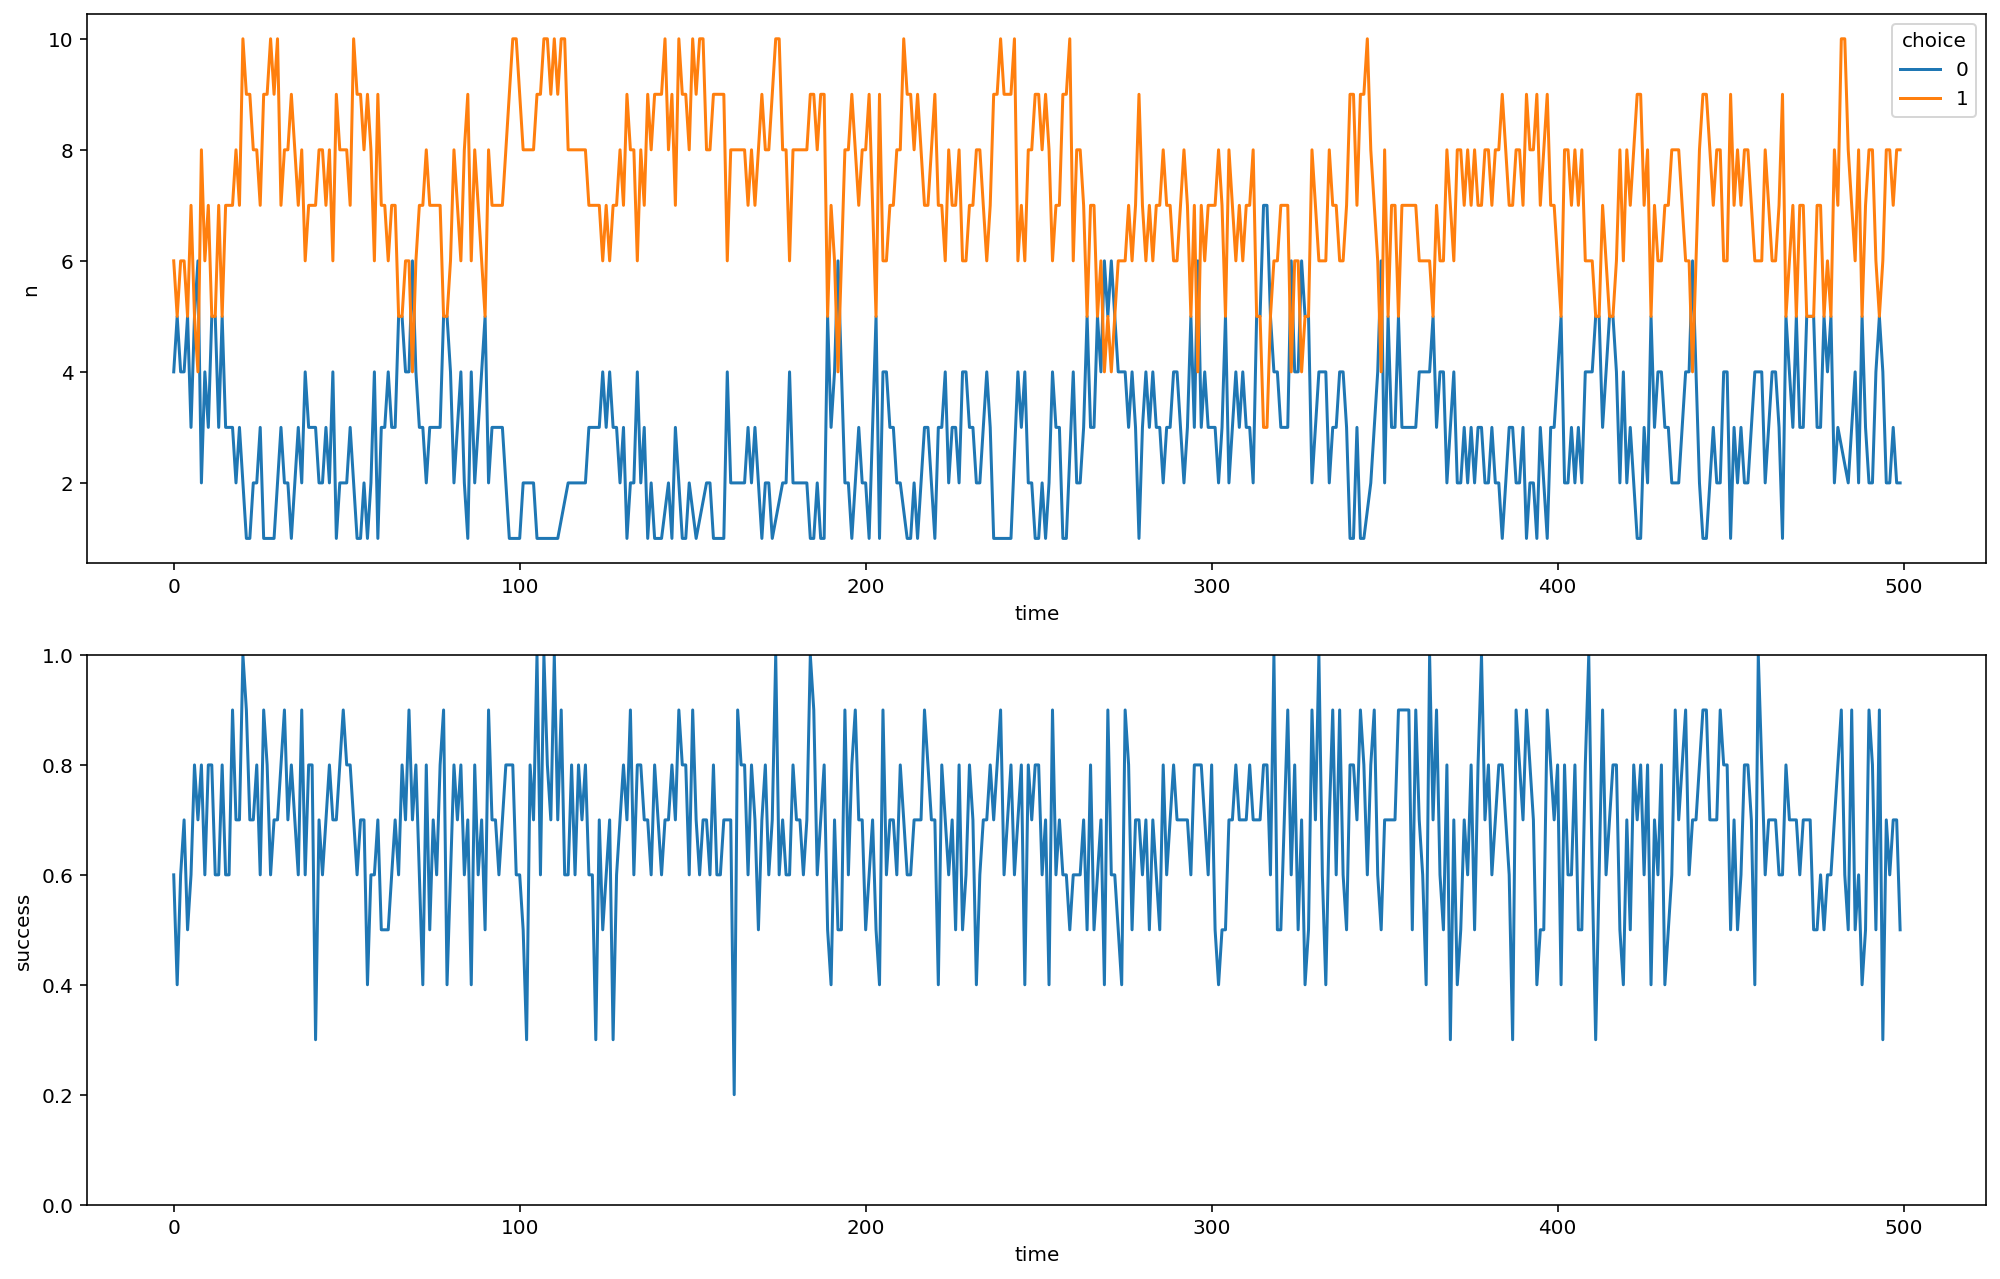

In [32]:
# Plot
fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

# Plot the choices
rep_choice = bhv_pop.groupby(['time', 'choice']).size().to_frame('n').reset_index()
sns.lineplot(data=rep_choice, x="time", y="n", hue="choice", ax=axes[0])

# Plot the successes
sns.lineplot(data=bhv_pop, x="time", y="success", ax=axes[1], ci=None)

# Set the limits of the y-axis
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### Compare candidate models for the group

Then let's inspect which model best explains behavior in the group. First, calculate the best fit parameters for each agent.

In [33]:
# Create a list 
row_list = []

# Loop over subjects
for id_, bhv in tqdm(bhv_pop.groupby("id"), file=sys.stdout):

    # For each model we wish to compare
    for m in models:
        
        # Specific case for the random model
        if m == Random:
            # There is no best param (non parametric model)
            best_param = []
            # Get log-likelihood for best param
            ll = log_likelihood(data=d, param=[], model=Random)
        else:
            # Optmize
            best_param, best_value = optimize(data=bhv, model=m)

            # Get log-likelihood for best param
            ll = -best_value

        # Compute the bit score
        bs = bic(ll, k=len(m.fit_bounds), n_iteration=T)
        
        # Add to the row list
        row_list.append({
            "id": id_,
            "BIC": bs,
            "LLS": ll,
            "model": m.__name__,
            "best-param": list(best_param)})

# Create dataframe and save it
model_comp = pd.DataFrame(row_list)
model_comp.to_csv(os.path.join(BKP_FOLDER, "model_comp.csv"))

100%|███████████████████████████████████████████| 10/10 [00:11<00:00,  1.11s/it]


In [34]:
# Load the results
model_comp = pd.read_csv(os.path.join(BKP_FOLDER, "model_comp.csv"), 
                         converters={'best-param': eval},
                         index_col=[0])
# Print...
display(model_comp)

,id,BIC,LLS,model,best-param
0,0,693.147181,-346.573590,Random,[]
1,0,528.912129,-261.348760,WSLS,[0.4328657221047008]
2,0,74.087335,-30.829059,RW,"[0.6573813992033158, 16.23823713315499]"
3,1,693.147181,-346.573590,Random,[]
4,1,551.131740,-272.458566,WSLS,[0.4689378775218526]
5,1,143.788166,-65.679475,RW,"[0.732434940127728, 13.363825789006201]"
6,2,693.147181,-346.573590,Random,[]
7,2,510.311645,-252.048519,WSLS,[0.40480961757852657]
8,2,155.369849,-71.470316,RW,"[0.6840754297703359, 10.806927940307444]"
9,3,693.147181,-346.573590,Random,[]


<div class="alert alert-block alert-info">
Note that we infer parameters for each agent in the group individually, as opposed to aggregating the data and considering that one set of parameters describes the whole group.
</div>

### Visualize results

Finally, let's visualize the model comparison results for the group of agents.

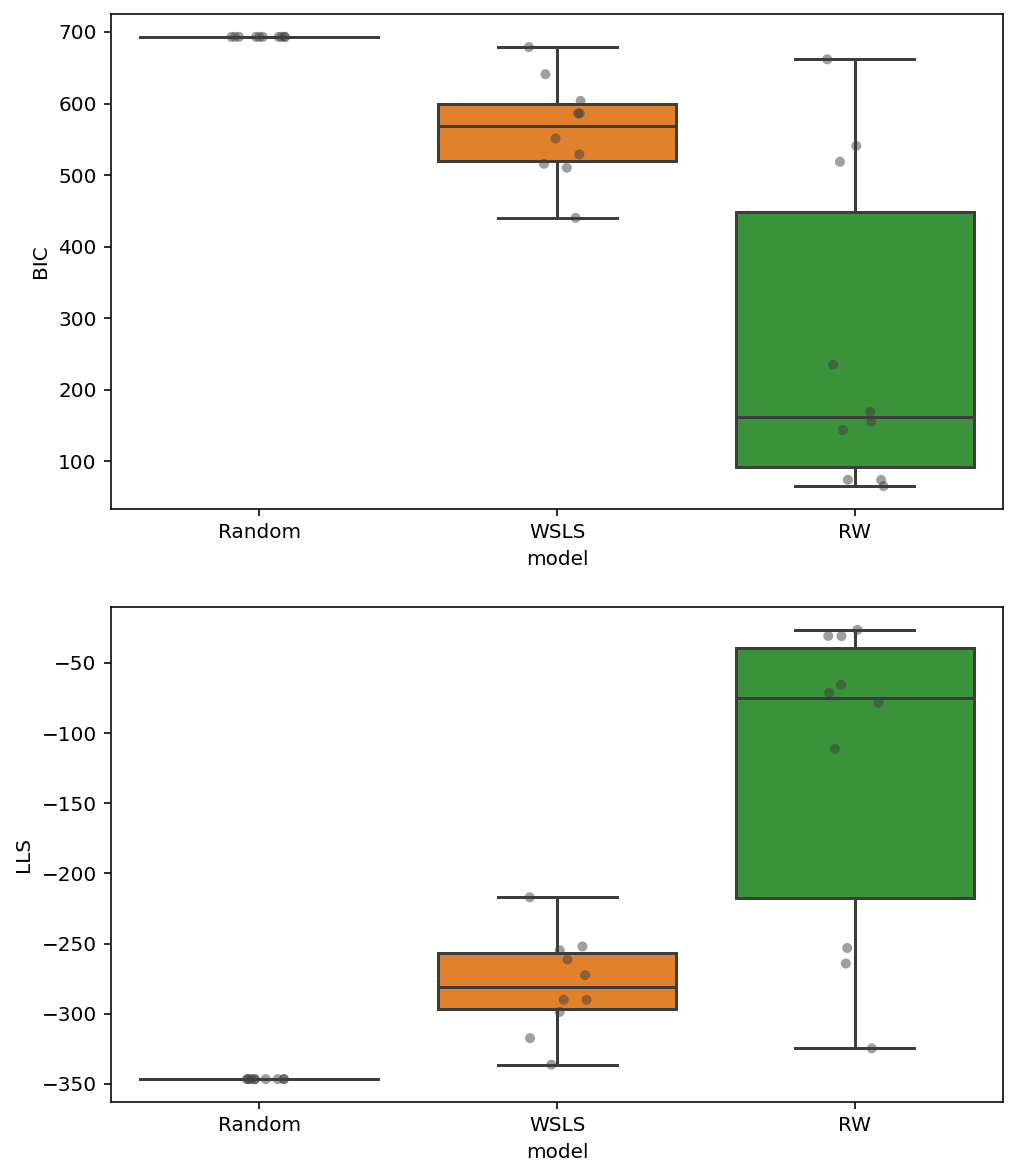

In [35]:
# Create figure and axis
fig, ax = plt.subplots(nrows=2,figsize=(8, 10))

for index, metric in enumerate(['BIC', 'LLS']):

    # Create the boxplots
    sns.boxplot(data=model_comp, x="model", y=metric, ax=ax[index])

    # Add the individual data points
    sns.stripplot(data=model_comp, x="model", y=metric, ax=ax[index], color=".25", alpha=0.5)

plt.show()

Note that again, the results above reflect the fact that the data was generated from Rescorla-Wagner.

<div class="alert alert-block alert-info">
Why is parameter recovery not considered in the group level analysis above?
</div>

## Bayesian inference

This notebook uses MLE to obtain point estimates of the parameters of interest. Instead, [Bayesian inference](https://en.wikipedia.org/wiki/Bayesian_inference) could be used to obtain posterior probabilities for these parameters. Some benefits of using Bayesian inference include the possibility to take advantage of prior knowledge and quantifying confidence in the parameter of interest $\theta$ being contained in a specific interval (see e.g., [Wagenmakers et al](https://doi.org/10.3758/s13423-017-1343-3])). There is plenty of material available online about the basics of Bayesian inference (e.g., [here](http://www.stat.columbia.edu/~gelman/book/)). Some probabilistic programming libraries for Python include [Pyro](https://pyro.ai), [PyMC3](https://docs.pymc.io/en/v3/) and [PyStan](https://mc-stan.org/users/interfaces/pystan). Further, [Gelman et al. (2020)](https://arxiv.org/abs/2011.01808) propose a specific Bayesian workflow, which also touches upon some of the concepts introduced in this notebook.

## Other model checks

We have only considered a few possible computational modeling workflow steps. Additional possible steps include:

- Model recovery
- Posterior predictive checks
- Cross validation

... and more, depending on the chosen inference technique and models.

A more comprehensive account of the techniques introduced in this lecture, and more, is available in previous year's lecture materials by Aurélien Nioche (available [here](https://github.com/AurelienNioche/LectureUserResearch/blob/master/OLD_lecture10.ipynb) and in [Wilson & Collins, 2019](https://doi.org/10.7554/eLife.49547)).

# References

A. Acharya, X. Chen, Christopher W. Myers, R. L. Lewis, and Andrew Howes. 2017. Human Visual Search as a Deep Reinforcement Learning Solution to a POMDP. (2017).

Andrea Barraza-Urbina and Dorota Glowacka. 2020. Introduction to Bandits in Recommender Systems. In <i>Fourteenth ACM Conference on Recommender Systems</i> (<i>RecSys '20</i>). Association for Computing Machinery, New York, NY, USA, 748–750. DOI:https://doi.org/10.1145/3383313.3411547

N. J. Butko and J. R. Movellan, "I-POMDP: An infomax model of eye movement," 2008 7th IEEE International Conference on Development and Learning, 2008, pp. 139-144, https://doi.org/10.1109/DEVLRN.2008.4640819.

Xiuli Chen, Gilles Bailly, Duncan P. Brumby, Antti Oulasvirta, and Andrew Howes. 2015. The Emergence of Interactive Behavior: A Model of Rational Menu Search. In <i>Proceedings of the 33rd Annual ACM Conference on Human Factors in Computing Systems</i> (<i>CHI '15</i>). Association for Computing Machinery, New York, NY, USA, 4217–4226. DOI:https://doi.org/10.1145/2702123.2702483

Clement, Benjamin, Roy, Didier, Oudeyer, Pierre-Yves, & Lopes, Manuel. (2015). Multi-Armed Bandits for Intelligent Tutoring Systems. Journal of Educational Data Mining, 7(2), 20–48. https://doi.org/10.5281/zenodo.3554668

Andrew Gelman, Aki Vehtari, Daniel Simpson, Charles C. Margossian, Bob Carpenter, Yuling Yao, Lauren Kennedy, Jonah Gabry, Paul-Christian Bürkner, & Martin Modrák. (2020). Bayesian Workflow. 

Heathcote A., Brown S., Wagenmakers EJ. (2015) An Introduction to Good Practices in Cognitive Modeling. In: Forstmann B., Wagenmakers EJ. (eds) An Introduction to Model-Based Cognitive Neuroscience. Springer, New York, NY. https://doi.org/10.1007/978-1-4939-2236-9_2

Hoppe, D., Rothkopf, C.A. Multi-step planning of eye movements in visual search. Sci Rep 9, 144 (2019). https://doi.org/10.1038/s41598-018-37536-0

Anthony J. Hornof and David E. Kieras. 1997. Cognitive modeling reveals menu search in both random and systematic. In <i>Proceedings of the ACM SIGCHI Conference on Human factors in computing systems</i> (<i>CHI '97</i>). Association for Computing Machinery, New York, NY, USA, 107–114. DOI:https://doi.org/10.1145/258549.258621

Jokinen, J. P. P., Kujala, T., & Oulasvirta, A. (2020). Multitasking in Driving as Optimal Adaptation Under Uncertainty. Human Factors. https://doi.org/10.1177/0018720820927687

Kangasrääsiö, A., Jokinen, J. P. P., Oulasvirta, A., Howes, A., & Kaski, S. (2019). Parameter inference for computational cognitive models with approximate bayesian computation. Cognitive Science, 43(6). https://doi.org/10.1111/cogs.12738

Lewandowsky, S., & Farrell, S. (2011). Computational modeling in cognition: Principles and practice. SAGE Publications, Inc., https://www.doi.org/10.4135/9781483349428

Jiri Najemnik and Wilson S. Geisler. 2005. Optimal eye movement strategies in visual search. Nature 434, 7031 (March 2005), 387–391. https://doi.org/10.1038/nature03390

Aurelien Nioche, Pierre-Alexandre Murena, Carlos de la Torre-Ortiz, and Antti Oulasvirta. 2021. Improving Artificial Teachers by Considering How People Learn and Forget. In <i>26th International Conference on Intelligent User Interfaces</i> (<i>IUI '21</i>). Association for Computing Machinery, New York, NY, USA, 445–453. https://doi.org/10.1145/3397481.3450696

A. Oulasvirta, N. R. Dayama, M. Shiripour, M. John and A. Karrenbauer, "Combinatorial Optimization of Graphical User Interface Designs," in Proceedings of the IEEE, vol. 108, no. 3, pp. 434-464, March 2020, https://doi.org/10.1109/JPROC.2020.2969687.

Palminteri, S., Wyart, V., & Koechlin, E. (2017). The importance of falsification in computational cognitive modeling. Trends in Cognitive Sciences, 21(6), 425–433. https://doi.org/10.1016/j.tics.2017.03.011

Wagenmakers, EJ., Marsman, M., Jamil, T. et al. Bayesian inference for psychology. Part I: Theoretical advantages and practical ramifications. Psychon Bull Rev 25, 35–57 (2018). https://doi.org/10.3758/s13423-017-1343-3

Wilson RC, Collins AG. Ten simple rules for the computational modeling of behavioral data. Elife. 2019 Nov 26;8:e49547. https://doi.org/10.7554/eLife.49547. PMID: 31769410; PMCID: PMC6879303.